In [2]:
import numpy as np
import matplotlib.pyplot as plt

address_bits = 13
sample_bits = 11
amplitude = 0.4

t = np.linspace(0, 2 * np.pi, 2 ** address_bits)
samples = amplitude * np.sin(t)
plt.scatter(t, samples, marker=',', s=1)
plt.show()

<Figure size 640x480 with 1 Axes>

Quantization error power:  0.08509216785262788
Theoretical (granular) error power:  0.08333333333333333
Calculated signal power: 83875.84000000003
Theoretical signal power: 83886.08000000002
Signal to noise ratio (dB): 59.938003121601966


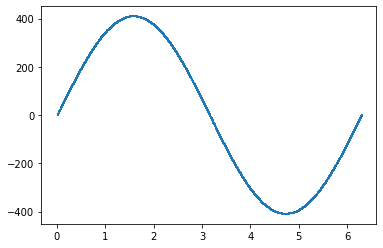

In [95]:
# the range [-1,1] is mapped into [-2^(sample_bits-1), 2^(sample_bits-1)-1]
quantized_values = np.round(2**(sample_bits-1) * samples).astype(int)
# clamp out of range values
quantized_values = np.clip(quantized_values, -2**(sample_bits-1), 2**(sample_bits-1)-1)
plt.scatter(t, quantized_values, s=1, marker=',')
#plt.scatter(t, quantized_values, s=1, marker=',')
quantization_error = quantized_values - 2**(sample_bits-1) * samples
quantization_error_power = np.sum(quantization_error ** 2)/len(t)
print("Quantization error power: ", quantization_error_power)

# estimated quantization error
delta = 1 #2vsat/L
print("Theoretical (granular) error power: ", delta**2/12)

# SNR
signal_power = (amplitude * 2**(sample_bits-1))**2/2
print("Calculated signal power:", np.sum((2**(sample_bits-1) * samples)**2)/len(t))
print("Theoretical signal power:", signal_power)

print("Signal to noise ratio (dB):", 10 * np.log10(signal_power/quantization_error_power))


In [6]:
delta = 2/(2**sample_bits)
q_err = delta**2/12
signal_power_2 = 1**2/2
print(10*np.log10(signal_power_2/q_err))

67.98751163663268


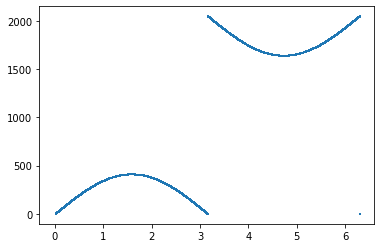

In [73]:
# Apply 2-complement to negative values
for i in range(0, len(quantized_values)):
    if quantized_values[i] < 0:
        quantized_values[i] = 2**sample_bits + quantized_values[i]
plt.scatter(t, quantized_values, marker=',', s=1)